In [2]:
import scanpy as sc
import convexgating as cg
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import os

def get_f1_hierarch_max2hierarch(perf_loc):
    tab = pd.read_csv(perf_loc)
    #tab = pd.read_csv('level_' +str(level) + '/cluster_' + celltype + '/performance.csv')
    best_loc_f1 = np.argmax(tab.iloc[0][1:])
    if best_loc_f1 > 1:
        best_loc_f1 = 1
    f1 = tab.iloc[0][1:][best_loc_f1]
    recall = tab.iloc[1][1:][best_loc_f1]
    precision = tab.iloc[2][1:][best_loc_f1]
    hierarchy = best_loc_f1 + 1
    return f1,recall,precision,hierarchy

# CyTOF

In [3]:
gating_dir_cytof = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_7\\CyTOF' 

### CD4

In [4]:
populations_CD4 = ['03_cluster_C7_hull', '02_cluster_C8_hull','05_cluster_C7_hull', '06_cluster_C8_hull','10_cluster_C7_hull', '11_cluster_C8_hull']
cluster_list = []
f1_list = []
recall_list = []
precision_list = []
hierarchy_list = []
for cluster in populations_CD4:
    perf_loc = os.path.join(gating_dir_cytof, cluster,cluster[3:-5],'performance.csv')
    f1,recall,precision,hierarchy = get_f1_hierarch_max2hierarch(perf_loc)
    #dp_list.append(dp)
    cluster_list.append(cluster)
    f1_list.append(f1)
    recall_list.append(recall)
    precision_list.append(precision)
    hierarchy_list.append(hierarchy)

data ={'f1':f1_list,'recall':recall_list,'precision':precision_list, 'cluster' : cluster_list}
df_summary =pd.DataFrame(data)
df_summary['modality'] = 'CyTOF'

df_summary['panel'] = ['full','full','CITEseq','CITEseq','FACS','FACS']

df_summary['cluster_short'] = df_summary['cluster'].apply(lambda x: x[11:-5])

df_summary_cytof_CD4 = df_summary.copy()
#df_summary_cytof_CD4.to_csv('F7_01_df_summary_cytof_CD4')

### CD8

In [5]:
populations_CD8 = ['03_cluster_C25_hull', '02_cluster_C26_hull','05_cluster_C25_hull', '06_cluster_C26_hull','10_cluster_C25_hull', '11_cluster_C26_hull']
cluster_list = []
f1_list = []
recall_list = []
precision_list = []
hierarchy_list = []
for cluster in populations_CD8:
    perf_loc = os.path.join(gating_dir_cytof, cluster,cluster[3:-5],'performance.csv')
    f1,recall,precision,hierarchy = get_f1_hierarch_max2hierarch(perf_loc)
    #dp_list.append(dp)
    cluster_list.append(cluster)
    f1_list.append(f1)
    recall_list.append(recall)
    precision_list.append(precision)
    hierarchy_list.append(hierarchy)

data ={'f1':f1_list,'recall':recall_list,'precision':precision_list, 'cluster' : cluster_list}
df_summary =pd.DataFrame(data)
df_summary['modality'] = 'CyTOF'

df_summary['panel'] = ['full','full','CITEseq','CITEseq','FACS','FACS']

df_summary['cluster_short'] = df_summary['cluster'].apply(lambda x: x[11:-5])

df_summary_cytof_CD8 = df_summary.copy()
#df_summary_cytof_CD8.to_csv('F7_01_df_summary_cytof_CD8')

# CITEseq

In [6]:
gating_dir_citeseq = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_7\\CITEseq\\04_run_gating_hull' 

folders = ['04_run_gating_denoised_FACS_panel_hull','04_run_gating_denoised_hull','04_run_gating_joint_panel_hull']

### CD4

In [7]:
cluster = 'cluster_CD16+ CD4+ T cell'
cluster_list = []
f1_list = []
recall_list = []
precision_list = []
hierarchy_list = []
for folder in folders:
    perf_loc = os.path.join(gating_dir_citeseq, folder,cluster,'performance.csv')
    f1,recall,precision,hierarchy = get_f1_hierarch_max2hierarch(perf_loc)
    #dp_list.append(dp)
    cluster_list.append(cluster)
    f1_list.append(f1)
    recall_list.append(recall)
    precision_list.append(precision)
    hierarchy_list.append(hierarchy)

data ={'f1':f1_list,'recall':recall_list,'precision':precision_list, 'cluster' : cluster_list}
df_summary =pd.DataFrame(data)
df_summary['modality'] = 'CITEseq'

df_summary['panel'] = ['full','CyTOF','FACS']

df_summary['cluster_short'] = df_summary['cluster'].apply(lambda x: x[14:])

df_summary_citeseq_CD4 = df_summary.copy()
#df_summary_citeseq_CD4.to_csv('F7_01_df_summary_citeseq_CD4')

### CD8

In [8]:
cluster = 'cluster_CD16+ CD8+ T cell'
cluster_list = []
f1_list = []
recall_list = []
precision_list = []
hierarchy_list = []
for folder in folders:
    perf_loc = os.path.join(gating_dir_citeseq, folder,cluster,'performance.csv')
    f1,recall,precision,hierarchy = get_f1_hierarch_max2hierarch(perf_loc)
    #dp_list.append(dp)
    cluster_list.append(cluster)
    f1_list.append(f1)
    recall_list.append(recall)
    precision_list.append(precision)
    hierarchy_list.append(hierarchy)

data ={'f1':f1_list,'recall':recall_list,'precision':precision_list, 'cluster' : cluster_list}
df_summary =pd.DataFrame(data)
df_summary['modality'] = 'CITEseq'

df_summary['panel'] = ['full','CyTOF','FACS']

df_summary['cluster_short'] = df_summary['cluster'].apply(lambda x: x[14:])

df_summary_citeseq_CD8 = df_summary.copy()

#df_summary_citeseq_CD8.to_csv('F7_01_df_summary_citeseq_CD8')

## summary CD4

In [ ]:
df_CD4 = df_summary_cytof_CD4.append(df_summary_citeseq_CD4)
df_CD4['cluster'] = df_CD4['cluster'] + '_' + df_CD4['panel']
df_CD4_melted = pd.melt(df_CD4[['f1','recall','precision','cluster']], id_vars="cluster", var_name="metric", value_name="score")

In [57]:
palette={"recall": "#e2998a","f1": "#663171","precision":"#0c7156"}
order = ['03_cluster_C7_hull_full','05_cluster_C7_hull_CITEseq','10_cluster_C7_hull_FACS',
         '02_cluster_C8_hull_full','06_cluster_C8_hull_CITEseq','11_cluster_C8_hull_FACS','cluster_CD16+ CD4+ T cell_full',
         'cluster_CD16+ CD4+ T cell_CyTOF',
         'cluster_CD16+ CD4+ T cell_FACS']

<Figure size 640x480 with 0 Axes>

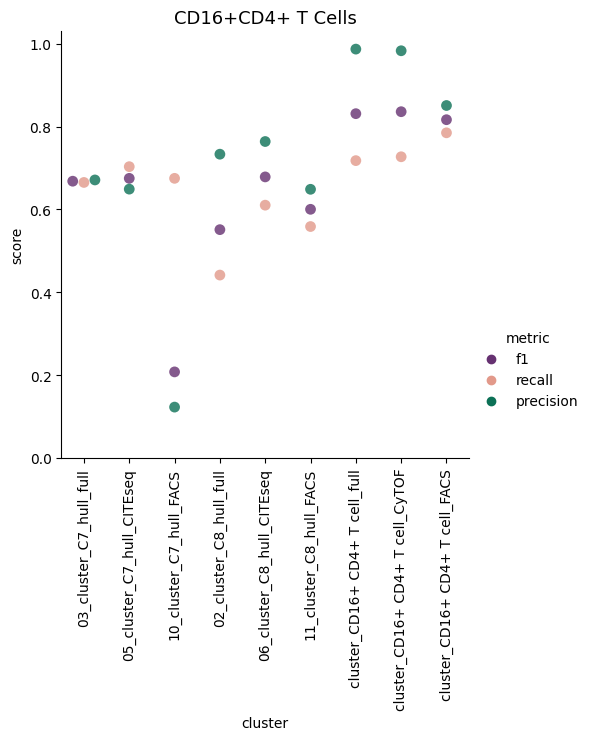

In [58]:
plt.figure()
sns.catplot(x='cluster', y="score", hue="metric", data=df_CD4_melted,s=60, kind='swarm',palette=palette,order = order,height = 5,alpha = 0.8)
plt.ylim([0,1.03])
plt.xticks(rotation=90)
plt.title('CD16+CD4+ T Cells',fontsize =13)
plt.savefig('F7_01_CD16CD4_T_cells_summary.pdf',bbox_inches='tight')
#plt.close()

# summary CD8

In [60]:
df_CD8 = df_summary_cytof_CD8.append(df_summary_citeseq_CD8)
df_CD8['cluster'] = df_CD8['cluster'] + '_' + df_CD8['panel']
df_CD8_melted = pd.melt(df_CD8[['f1','recall','precision','cluster']], id_vars="cluster", var_name="metric", value_name="score")

palette={"recall": "#e2998a","f1": "#663171","precision":"#0c7156"}

order = ['03_cluster_C25_hull_full','05_cluster_C25_hull_CITEseq','10_cluster_C25_hull_FACS',
         '02_cluster_C26_hull_full','06_cluster_C26_hull_CITEseq','11_cluster_C26_hull_FACS','cluster_CD16+ CD8+ T cell_full',
         'cluster_CD16+ CD8+ T cell_CyTOF',
         'cluster_CD16+ CD8+ T cell_FACS']

<Figure size 640x480 with 0 Axes>

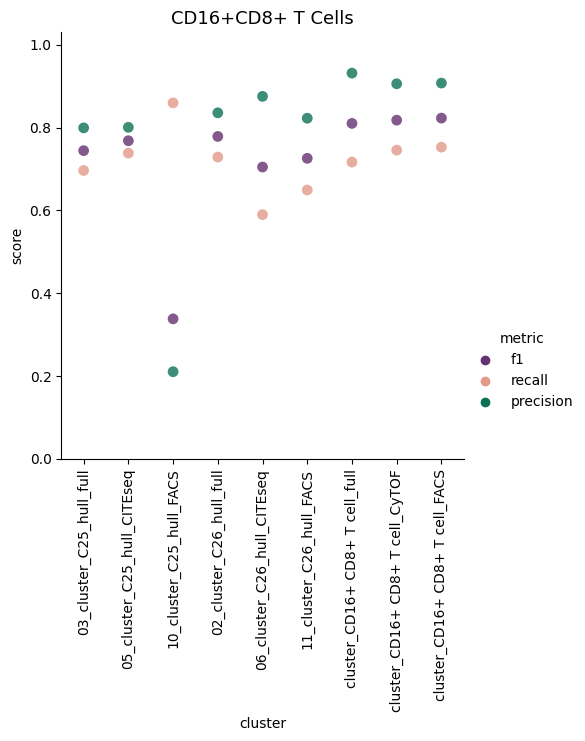

In [61]:
plt.figure()
sns.catplot(x='cluster', y="score", hue="metric", data=df_CD8_melted,s=60, kind='swarm',palette=palette,order = order,height = 5,alpha = 0.8)
plt.ylim([0,1.03])
plt.xticks(rotation=90)
plt.title('CD16+CD8+ T Cells',fontsize =13)
plt.savefig('F7_01_CD16CD8_T_cells_summary.pdf',bbox_inches='tight')